# <center><font size ="9"> Lab 01 </font></center>
<center><font size ="6"> Data Visualization: Covid 19 Report - 21/4/2021</font></center></br>
<p style='text-align: right;'><font size ="3"> University of Science - VNUHCM</font></p>
</br>

## Request: 

- Focus on visualization
- Do not use color to describe information

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
from IPython.display import Image, display

In [2]:
#Set Option
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_theme()

## Open File

In [3]:
df = pd.read_csv('data/Worldometer_4_21.csv', index_col = 0)

In [4]:
df.head(3)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
#,,,,,,,,,,,,,,,,,
1,China,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776,15897.0,310467.0,9.0
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810,10.0,570.0,1.0
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395,87.0,7532.0,5.0


## Preprocessing

Xóa 3 cột cuối cột 

In [5]:
df = df.drop(columns=['1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl'])

Xóa 2 quốc gia có dân số bị trống

In [6]:
df[df['Population'] == ' ']

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
195,Diamond Princess,712,NaN,13,NaN,699,NaN,0,NaN,NaN,NaN,NaN,NaN,
217,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,


In [7]:
df[df['TotalDeaths'] == ' '] = df[df['TotalDeaths'] == ' '].replace(' ',0)

In [8]:
df = df[df['Population'] != ' ']
df['Population'].unique()

array(['1439323776 ', '332563810', '1390901395', '213774168', '65389827',
       '145984885', '85067708', '68172895', '60390143', '46769371',
       '83999616', '45528947', '37813194', '51318345', '84855437',
       '130020459', '43521622', '33340173', '275845986', '10724982',
       '59908639', '17165404', '38008037', '19248054', '19134054',
       '40943818', '110750945', '11630213', '10149909', '9197590 ',
       '10172727', '224324332', '9640567', '166007114', '10284484',
       '8708972', '8705502', '9047733', '126164132', '6800778',
       '37261672', '9986297', '35248367', '6906193', '32698684',
       '5461773', '17857786', '4369196', '9446818', '10381961', '4084825',
       '10212599', '3982992', '18956949', '11917920', '11800723',
       '29556378', '5196155', '10935274', '4321201', '7202841', '4026402',
       '117237164', '5808621', '4982064', '2691549', '2079168', '5131488',
       '103879157', '18180845', '2967704', '10030833', '2807805 ',
       '3264341', '28370951', '5

In [9]:
df[['TotalDeaths','Population']] = df[['TotalDeaths','Population']].astype('int')

In [10]:
df.select_dtypes(exclude='object')
df.head(3)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
1,China,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395


In [13]:
df.fillna(0,inplace=True)
df.head(3)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
1,China,90541,21.0,4636,0.0,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395


## Simple Exploring

In [11]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25)
def median(df):
    return df.quantile(0.5)
def upper_quartile(df):
    return df.quantile(0.75)

In [12]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
missing_ratio,0.0,17.8,0.0,43.8,0.0,27.4,0.0,32.4,0.0,6.4,4.1,4.1,0.000000e+00
min,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,8.0,0.3,470.0,756.0,8.030000e+02
lower_quartile,5030.0,36.8,75.0,5.0,3830.0,38.5,197.0,12.0,1766.0,33.0,113277.2,48551.8,6.452855e+05
median,41475.0,372.5,640.0,14.0,35065.0,306.0,3675.0,71.0,15365.0,236.0,887827.5,233676.5,6.610425e+06
upper_quartile,290731.0,1948.8,4916.0,57.0,248504.0,1991.0,25744.5,518.5,53417.5,820.0,4464741.5,682957.5,2.437719e+07
max,32602051.0,315802.0,583330.0,3157.0,25177434.0,179543.0,6841287.0,10009.0,166962.0,2791.0,433439646.0,6724757.0,1.439324e+09


## Visualize Data

In [216]:
selected_cols = ['TotalCases','NewCases', 'TotalDeaths', 'NewDeaths','TotalRecovered','NewRecovered']

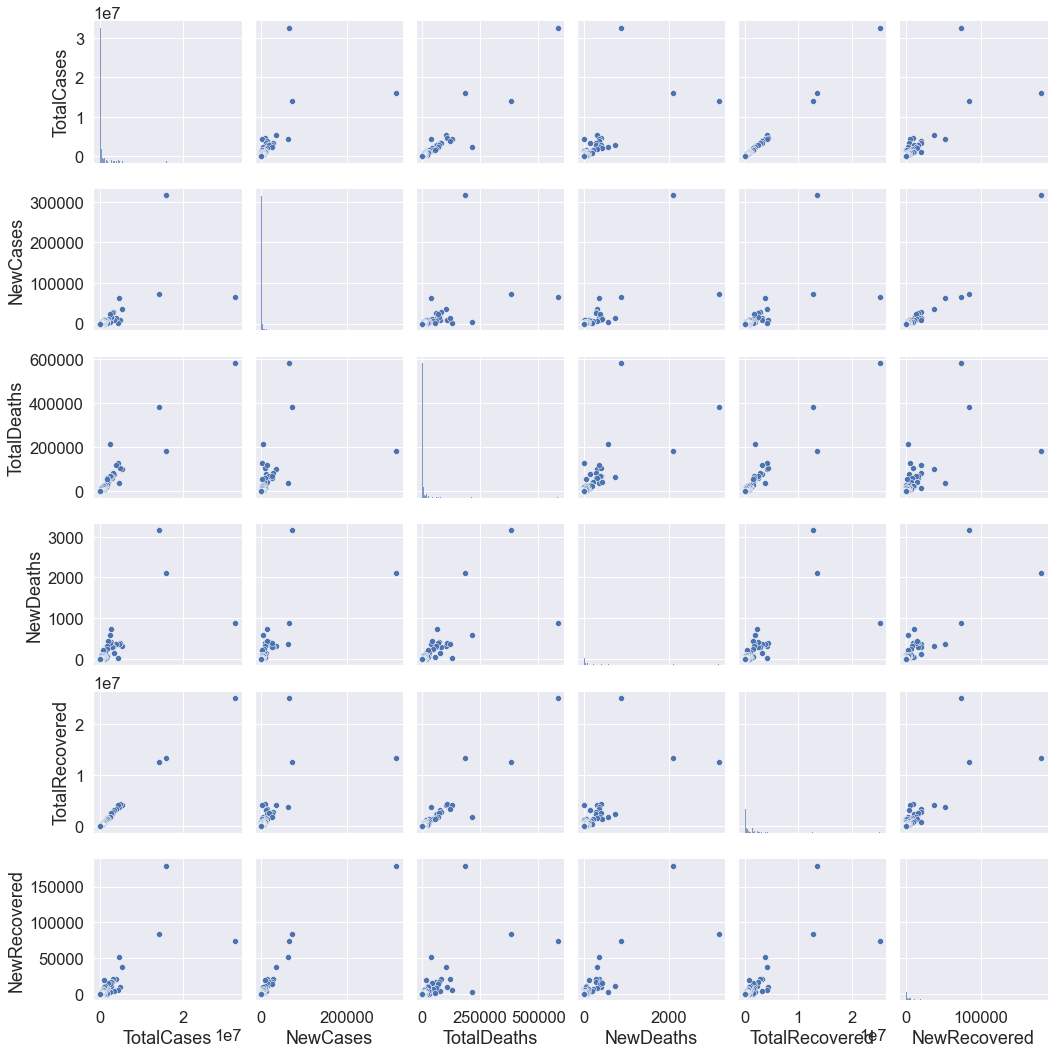

In [217]:
sns.pairplot(df[selected_cols])#, height=2.0)

In [211]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 1 to 221
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country,Other     219 non-null    object 
 1   TotalCases        219 non-null    int64  
 2   NewCases          219 non-null    float64
 3   TotalDeaths       219 non-null    int32  
 4   NewDeaths         219 non-null    float64
 5   TotalRecovered    219 non-null    int64  
 6   NewRecovered      219 non-null    float64
 7   ActiveCases       219 non-null    int64  
 8   Serious,Critical  219 non-null    float64
 9   Tot Cases/1M pop  219 non-null    float64
 10  Deaths/1M pop     219 non-null    float64
 11  TotalTests        219 non-null    float64
 12  Tests/1M pop      219 non-null    float64
 13  Population        219 non-null    int32  
dtypes: float64(8), int32(2), int64(3), object(1)
memory usage: 34.0+ KB


In [17]:
df.select_dtypes(exclude='object').iloc[:,range(0,7)].values.shape

(219, 7)

In [175]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df.select_dtypes(exclude='object').values)

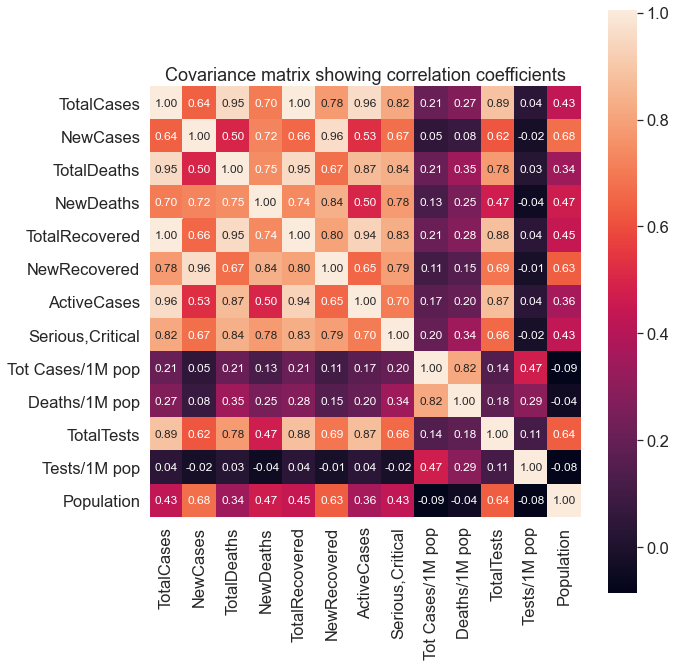

In [241]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=df.select_dtypes(exclude='object').columns,
                 xticklabels=df.select_dtypes(exclude='object').columns,
#                  vmin = 0.00001,
#                  vmax = 0.00001
                )
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

- Choose 3 features that correlates strongly with each other.
- Choose 6 features and cross visualization 


- BAr chart
- Grouped BAr Chart
- Scatter 
- Heat map
- Area
- Line
- Stack Bar

**"Tot Cases/1M pop"Deaths/1M pop**

Chọn biểu đồ histogram để xem sự phân phối của "Tot Cases/1M pop"

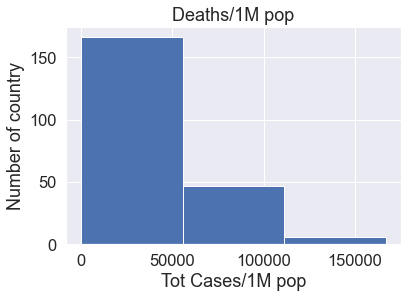

In [20]:
plt.hist(df['Tot Cases/1M pop'], bins = 3)
plt.xlabel('Tot Cases/1M pop')
plt.ylabel('Number of country')
plt.title('Deaths/1M pop')
plt.show()

Nhận xét về "Tot Cases/1M pop":
- Đa phần các quốc gia nằm trong khoảng từ 0 đến hơn 50000 với con số khoảng 150 quốc gia
- Các quốc gia mang chỉ số "Tot Cases/1M pop" cao hơn 100000 khá là ít
- Gần 50 quốc gia có chỉ số "Tot Cases/1M pop" từ 50000 - 100000

**"Deaths/1M pop"**

Tương tự với việc sử dụng biểu đồ histogram cho "Tot Cases/1M pop" ta cũng dùng cho "Deaths/1M pop" để xem xét sự phân phối của chỉ số này

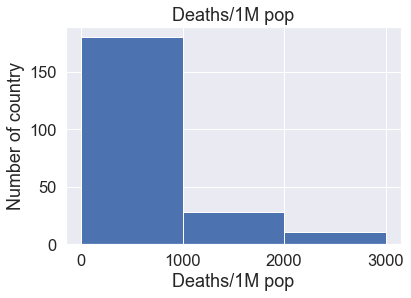

In [21]:
plt.hist(df['Deaths/1M pop'], bins = 3, range = [0,3000])
plt.xlabel('Deaths/1M pop')
plt.ylabel('Number of country')
plt.title('Deaths/1M pop')
plt.show()

Nhận xét về "Deaths/1M pop":
- Đa phần các quốc gia đều có chỉ số "Deaths/1M pop" từ 0 - 1000 với có số khoảng 175 quốc gia
- Một số ít quốc gia có chỉ số "Deaths/1M pop" từ 1000 - 2000 với con số khoảng 25 quốc gia
- Và một số rất ít quốc gia có chỉ số "Deaths/1M pop" từ 2000 - 3000
- Có vẻ như "Deaths/1M pop" có mối quan hệ gì đó với chỉ số "Tot Cases/1M pop" bởi vì phân phối của cả 2 chỉ số này khá giống nhau

**"Tot Cases/1M pop" vs "Deaths/1M pop"**
- Sử dụng scatter chart để xem mối tương quan giữa "Tot Cases/1M pop" vs "Deaths/1M pop

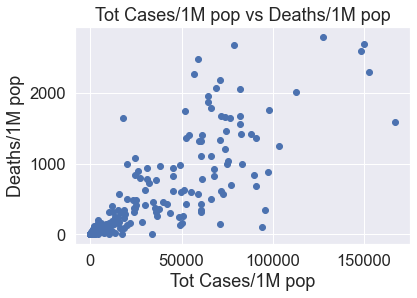

In [22]:
plt.scatter(df['Tot Cases/1M pop'], df['Deaths/1M pop'], marker= 'o')
plt.xlabel('Tot Cases/1M pop')
plt.ylabel('Deaths/1M pop')
plt.title('Tot Cases/1M pop vs Deaths/1M pop')
plt.show()

Nhận xét "Tot Cases/1M pop" vs "Deaths/1M pop":

- Ta có thể thấy "Tot Cases/1M pop" vs "Deaths/1M pop" 2 trường có mối quan hệ tương quan với nhau

**TotalCases**

Sử dụng Pie chart để xem tỉ lệ phần trăm của top 3 quốc gia có tổng số ca mắc COVID cao nhất so với các quốc gia khác

In [23]:
top3 = df.nlargest(3, 'TotalCases')

label = top3['Country,Other']
s2 = pd.Series(['Other'])
label = label.append(s2)

value = top3['TotalCases']
s2 = pd.Series([df[df['TotalCases'] < top3['TotalCases'].min()].sum()[1]])
value = value.append(s2)

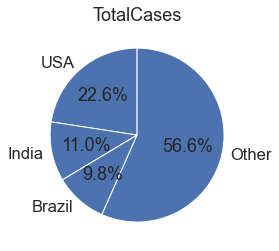

In [24]:
plt.pie(value, labels = label, colors = 'b', autopct='%1.1f%%', startangle=90)
plt.title('TotalCases')
plt.show()

Nhận xét về "TotalCases":
- Có thể thấy USA là quốc gia có tổng số ca mắc COVID cao nhất thế giới, đồng thời nó cũng chiếm tỉ lệ tới 22,6% trên tổng số ca nhiễm trên toàn thế giới gấp 2 lần quốc gia đứng thứ 2 là India với 11%
- Tổng số ca mắc COVID của 2 quốc gia India và Brazil chiếm tỉ trọng không quá nhiều

**TotalDeaths**

Dùng histogram để xem xét sự phân phối của tổng số người chết của các quốc gia

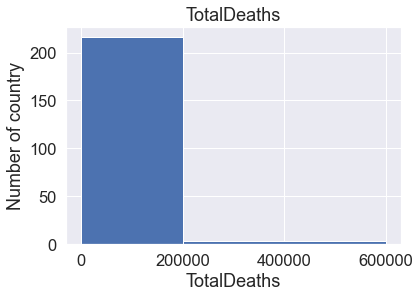

In [25]:
plt.hist(df['TotalDeaths'], bins = [0,200000,600000])
plt.xlabel('TotalDeaths')
plt.ylabel('Number of country')
plt.title('TotalDeaths')
plt.show()

Nhận xét "TotalDeaths":
- Có thể thầy hầu hết các quốc gia đều có tổng số người chết dưới 200000
- Một số ít quốc gia có tổng số người chết đặc biệt cao từ 200000 - 600000

**"TotalCases" vs "TotalDeaths"**
Dùng scatter chart để xem xét mối quan hệ giữa tổng số ca mắc bệnh và tổng số người chết

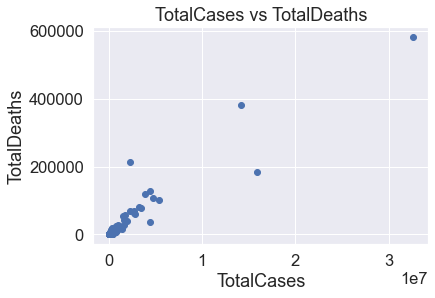

In [26]:
plt.scatter(df['TotalCases'], df['TotalDeaths'], marker= 'o')
plt.xlabel('TotalCases')
plt.ylabel('TotalDeaths')
plt.title(r'TotalCases vs TotalDeaths')
plt.show()

Nhận xét "TotalCases" vs "TotalDeaths":
- Hai chỉ só có mối quan hệ tương quan với nhau
- Hầu hết quốc gia đều đang ở tình trạng tổng số ca tử vong và ca mắc bệnh ở mức thấp
- Đặc biệt chỉ có một số rất ít quốc gia có tổng số ca tử vong và ca mắc bệnh có chỉ số cao ngất ngưỡng

## Khang

## ActiveCases-NewCases and NewCases

What is the relationship between ActiveCases and NewCases? We know that people can infect to others when they are infected undetected 

## TotalTests, TotalDeaths, TotalRecovered

In the covariance Matrix, we see these 3 features have a strong correlation with each other. We care about these 3 features because we care about Recovery, against Deaths and the one we can affect is the test. What is the information we can get from them?


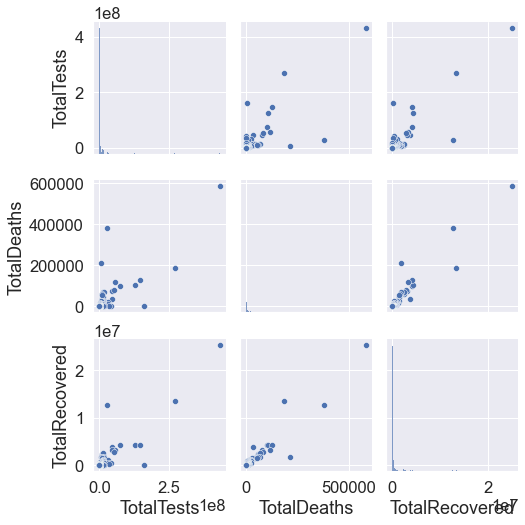

In [221]:
selected_cols = ['TotalTests','TotalDeaths','TotalRecovered']
sns.pairplot(df[selected_cols])#, height=2.0)

<AxesSubplot:xlabel='TotalDeaths', ylabel='TotalRecovered'>

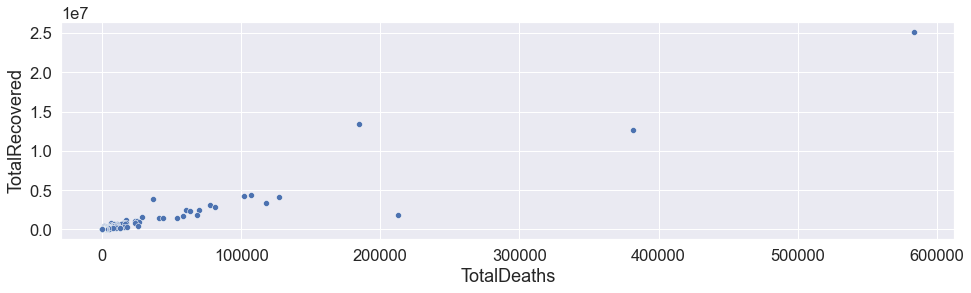

In [27]:
plt.figure(figsize=(16,4))
sns.scatterplot(data = df, x = 'TotalDeaths', y= 'TotalRecovered')#, style = 'TotalTests')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

It seems like that `TotalRecovered` has the regression relationship with `TotalDeaths`

We zoom to where the distribution is most dense:

<AxesSubplot:xlabel='TotalDeaths', ylabel='TotalRecovered'>

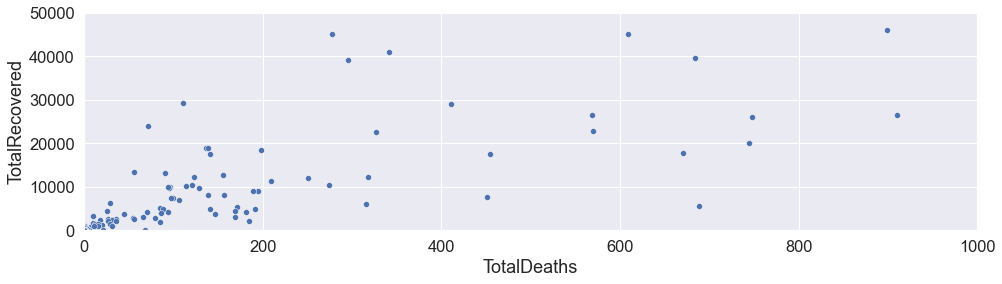

In [28]:
plt.figure(figsize=(16,4))
plt.axis([0, 1000, 0, 50000])
sns.scatterplot(data = df, x = 'TotalDeaths', y= 'TotalRecovered')

We see that it is the regression relationship, but with high noise

I want to add `TotalTests` to the chart above to see more information (if it has)

The idea to visualize TotalTest to this chart is binning values of `TotalTests`, then visualize it as style.

In [92]:
df_1 = df.copy()
df_1['TotalTests_bins'] = pd.cut(np.array(df_1['TotalTests']),bins=3,labels=['Low','Medium','High'])

In [78]:
df_1['TotalTests_bins'].value_counts()

Low       215
Medium      3
High        1
Name: TotalTests_bins, dtype: int64

</br>

The problem is TotalTests is imbalanced


We first see where the imbalance point in the chart to have a big picture, then zoom to where the distribution is most dense, and deal with the imbalanced

<AxesSubplot:xlabel='TotalDeaths', ylabel='TotalRecovered'>

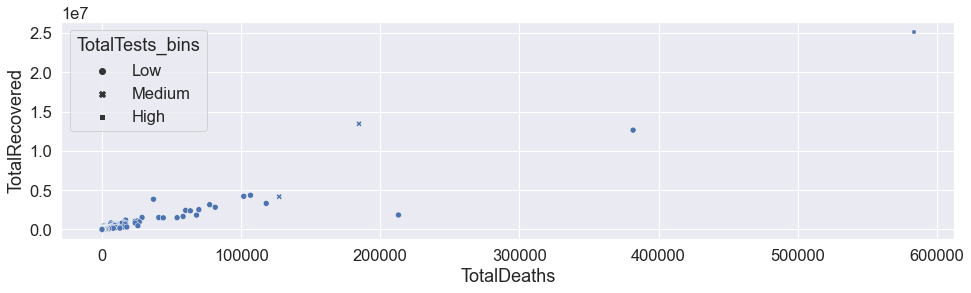

In [81]:
plt.figure(figsize=(16,4))
# plt.axis([0, 1000, 0, 50000])
sns.scatterplot(data = df_1, x = 'TotalDeaths', y= 'TotalRecovered', style = 'TotalTests_bins')

One country high in `TotalDeaths`,`TotalRecovered` high in `TotalTest` too, this is the outlier, but still have the correlate between these 3 feautures.

This country is:

In [95]:
df_1[df_1['TotalTests_bins'] == 'High']

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,TotalTests_bins
#,,,,,,,,,,,,,,,
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810,High


There is one thing that special, in 3 points has Medium TotalTests, 2 points we can see in the big chart, mean the `TotalDeaths` and the `TotalRecovered` at these points have correlated with the `TotalTests`,  just like most points has Low `TotalTetsts`. But one, we can not see. We check that:

In [107]:
df_1[df_1['TotalTests_bins'] == 'Medium']

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,TotalTests_bins
#,,,,,,,,,,,,,,,
1,China,90541,21.0,4636,0.0,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776,Medium
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395,Medium
8,UK,4395703,2396.0,127327,22.0,4166734,5301.0,101642,300.0,64479.0,1868.0,146043397.0,2142250.0,68172895,Medium


It is **China**, where the virus from. This country has low `TotalCases`, low `ToTal Deaths`, and high in `TotalTests`


Now, we deal with the imbalanced: 

In [142]:
# df_2 = df_1.copy()
df_1['TotalTests'].skew()

8.038082042855878

In [163]:
transformed = np.log(df_1['TotalTests'] + 10000)
transformed.skew()

0.16754407526658413

In [165]:
df_1['TotalTests'] = transformed

In [166]:
df_1['TotalTests_bins'] = pd.cut(np.array(df_1['TotalTests']),bins=3,labels=['Low','Medium','High'])
df_1['TotalTests_bins'].value_counts()

Medium    104
Low        91
High       24
Name: TotalTests_bins, dtype: int64

<AxesSubplot:xlabel='TotalDeaths', ylabel='TotalRecovered'>

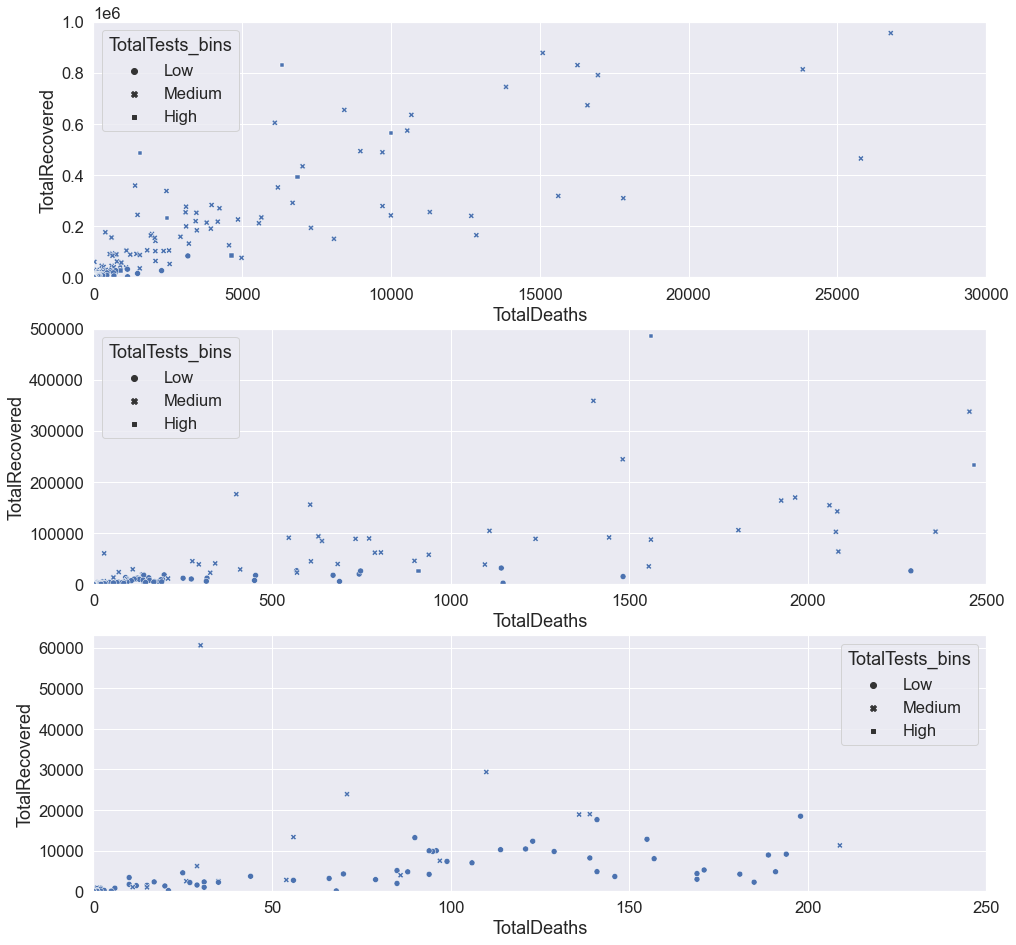

In [209]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(16, 16)
# plt.figure(figsize=(16,4))
axs[0].axis([0, 30000, 0, 1000000])
sns.scatterplot(data = df_1, x = 'TotalDeaths', y= 'TotalRecovered', style = 'TotalTests_bins', ax = axs[0])
axs[1].axis([0, 2500, 0, 500000])
sns.scatterplot(data = df_1, x = 'TotalDeaths', y= 'TotalRecovered', style = 'TotalTests_bins', ax = axs[1])
axs[2].axis([0, 250, 0, 63000])
sns.scatterplot(data = df_1, x = 'TotalDeaths', y= 'TotalRecovered', style = 'TotalTests_bins', ax = axs[2])

## Thang

In [30]:
cs_df = pd.read_csv('data/Worldometer_4_21.csv')
cs_df.head(30)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,1,China,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776,15897.0,310467.0,9.0
1,2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810,10.0,570.0,1.0
2,3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395,87.0,7532.0,5.0
3,4,Brazil,14122795,71910.0,381687,3157.0,12646132,84443.0,1094976,8318.0,66064.0,1785.0,28600000.0,133786.0,213774168,15.0,560.0,7.0
4,5,France,5374288,34968.0,101881,313.0,4218607,37226.0,1053800,5959.0,82188.0,1558.0,72936321.0,1115408.0,65389827,12.0,642.0,1.0
5,6,Russia,4727125,8271.0,106706,399.0,4352873,9644.0,267546,2300.0,32381.0,731.0,126500000.0,866528.0,145984885,31.0,1368.0,1.0
6,7,Turkey,4446591,61967.0,36975,362.0,3844342,52213.0,565274,3398.0,52271.0,435.0,44728595.0,525800.0,85067708,19.0,2301.0,2.0
7,8,UK,4395703,2396.0,127327,22.0,4166734,5301.0,101642,300.0,64479.0,1868.0,146043397.0,2142250.0,68172895,16.0,535.0,0.0
8,9,Italy,3904899,13844.0,117997,364.0,3311267,20552.0,475635,3076.0,64661.0,1954.0,55885251.0,925404.0,60390143,15.0,512.0,1.0
9,10,Spain,3446072,10232.0,77364,148.0,3151587,4306.0,217121,2288.0,73682.0,1654.0,44374223.0,948788.0,46769371,14.0,605.0,1.0


In [91]:
df.head(3)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
1,China,90541,21.0,4636,0.0,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395


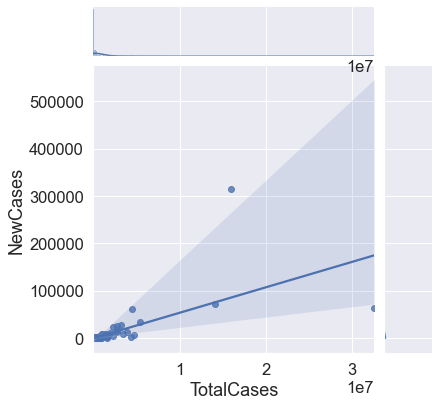

In [86]:
sns.jointplot(x = 'TotalCases', y ='NewCases', data = df, kind ='reg' )

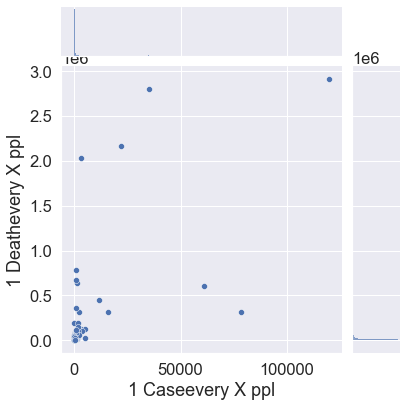

In [89]:
sns.jointplot(x = '1 Caseevery X ppl', y ='1 Deathevery X ppl', data = cs_df, kind ='scatter' )

<AxesSubplot:xlabel='Tot Cases/1M pop', ylabel='Deaths/1M pop'>

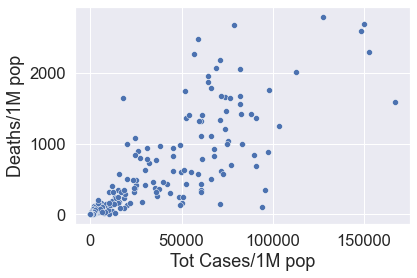

In [35]:
sns.scatterplot(x = 'Tot Cases/1M pop', y = 'Deaths/1M pop', data = cs_df)

<AxesSubplot:xlabel='Tot Cases/1M pop', ylabel='Tests/1M pop'>

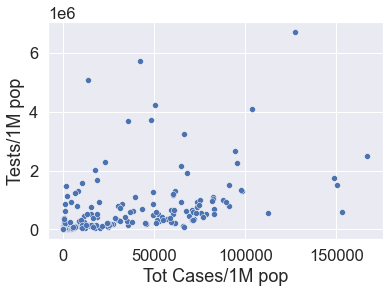

In [36]:
sns.scatterplot(x = 'Tot Cases/1M pop', y = 'Tests/1M pop', data = cs_df)

<AxesSubplot:xlabel='Deaths/1M pop', ylabel='Tests/1M pop'>

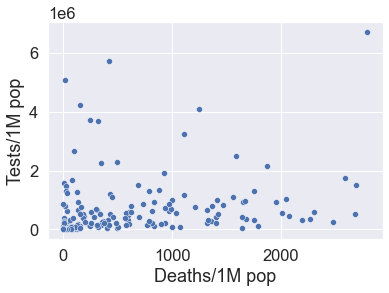

In [37]:
sns.scatterplot(x = 'Deaths/1M pop', y = 'Tests/1M pop', data = cs_df)